In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wgbs-all-cpgs-with-values-symbol/all_CpGs_with_values.csv


In [2]:
df = pd.read_csv('/kaggle/input/wgbs-all-cpgs-with-values-symbol/all_CpGs_with_values.csv', sep='\t')
display(df.tail())

,seqnames,start,end,width,strand,CpG,WT,Cdca7,Hells,Dnmt3b,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,SYMBOL
18942586,chrY,90843393,90843393,1,*,18942872,75,66,72,75,Intron (ENSMUST00000189352.1/ENSMUST0000018935...,21,90790451,90816465,26015,1,170942,ENSMUST00000238471.1,52942.0,Erdr1
18942587,chrY,90843412,90843412,1,*,18942873,87,100,91,87,Intron (ENSMUST00000189352.1/ENSMUST0000018935...,21,90790451,90816465,26015,1,170942,ENSMUST00000238471.1,52961.0,Erdr1
18942588,chrY,90843439,90843439,1,*,18942874,87,33,83,87,Intron (ENSMUST00000189352.1/ENSMUST0000018935...,21,90790451,90816465,26015,1,170942,ENSMUST00000238471.1,52988.0,Erdr1
18942589,chrY,90843732,90843732,1,*,18942875,100,66,100,50,Intron (ENSMUST00000189352.1/ENSMUST0000018935...,21,90790451,90816465,26015,1,170942,ENSMUST00000238471.1,53281.0,Erdr1
18942590,chrY,90843740,90843740,1,*,18942876,85,83,100,100,Intron (ENSMUST00000189352.1/ENSMUST0000018935...,21,90790451,90816465,26015,1,170942,ENSMUST00000238471.1,53289.0,Erdr1


In [3]:
df.rename(columns = {'seqnames':'chr'}, inplace = True)
df

,chr,start,end,width,strand,CpG,WT,Cdca7,Hells,Dnmt3b,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,SYMBOL
1,chr1,3000827,3000827,1,*,0,88,94,87,100,Distal Intergenic,1,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,670671.0,Xkr4
2,chr1,3001007,3001007,1,*,1,95,57,88,92,Distal Intergenic,1,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,670491.0,Xkr4
3,chr1,3001018,3001018,1,*,2,94,60,55,90,Distal Intergenic,1,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,670480.0,Xkr4
4,chr1,3001629,3001629,1,*,3,84,88,66,66,Distal Intergenic,1,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,669869.0,Xkr4
5,chr1,3003339,3003339,1,*,4,87,100,100,83,Distal Intergenic,1,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,668159.0,Xkr4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18942586,chrY,90843393,90843393,1,*,18942872,75,66,72,75,Intron (ENSMUST00000189352.1/ENSMUST0000018935...,21,90790451,90816465,26015,1,170942,ENSMUST00000238471.1,52942.0,Erdr1
18942587,chrY,90843412,90843412,1,*,18942873,87,100,91,87,Intron (ENSMUST00000189352.1/ENSMUST0000018935...,21,90790451,90816465,26015,1,170942,ENSMUST00000238471.1,52961.0,Erdr1
18942588,chrY,90843439,90843439,1,*,18942874,87,33,83,87,Intron (ENSMUST00000189352.1/ENSMUST0000018935...,21,90790451,90816465,26015,1,170942,ENSMUST00000238471.1,52988.0,Erdr1
18942589,chrY,90843732,90843732,1,*,18942875,100,66,100,50,Intron (ENSMUST00000189352.1/ENSMUST0000018935...,21,90790451,90816465,26015,1,170942,ENSMUST00000238471.1,53281.0,Erdr1


In [4]:
# How to filter rows containing a string pattern from a Pandas dataframe
pattern = 'Pcdha1|Pcdha10|Pcdha11|Pcdha12|Pcdha2|Pcdha3|Pcdha4|Pcdha5|Pcdha6|Pcdha7|Pcdha8|Pcdha9|Pcdhac1|Pcdhac2|Pcdhb1|Pcdhb10|Pcdhb11|Pcdhb12|Pcdhb13|Pcdhb14|Pcdhb15|Pcdhb16|Pcdhb17|Pcdhb18|Pcdhb19|Pcdhb2|Pcdhb20|Pcdhb21|Pcdhb22|Pcdhb3|Pcdhb4|Pcdhb5|Pcdhb6|Pcdhb7|Pcdhb8|Pcdhb9|Pcdhga1|Pcdhga10|Pcdhga11|Pcdhga12|Pcdhga2|Pcdhga3|Pcdhga4|Pcdhga5|Pcdhga6|Pcdhga7|Pcdhga8|Pcdhga9|Pcdhgb1|Pcdhgb2|Pcdhgb3|Pcdhgb4|Pcdhgb5|Pcdhgb6|Pcdhgb7|Pcdhgb8|Pcdhgc3|Pcdhgc4|Pcdhgc5'
mask = df["SYMBOL"].str.contains(pattern, case=False, na=False)
df[mask]
df_main = df[mask]
df_main

,chr,start,end,width,strand,CpG,WT,Cdca7,Hells,Dnmt3b,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,SYMBOL
8368436,chr18,36925548,36925548,1,*,8368435,50,30,47,76,Distal Intergenic,18,36930184,37187661,257478,1,116731,ENSMUST00000193839.5,-4636.0,Pcdha1
8368437,chr18,36925649,36925649,1,*,8368436,25,13,10,14,Distal Intergenic,18,36930184,37187661,257478,1,116731,ENSMUST00000193839.5,-4535.0,Pcdha1
8368438,chr18,36926060,36926060,1,*,8368437,38,0,20,45,Distal Intergenic,18,36930184,37187661,257478,1,116731,ENSMUST00000193839.5,-4124.0,Pcdha1
8368439,chr18,36926363,36926363,1,*,8368438,94,50,58,81,Distal Intergenic,18,36930184,37187661,257478,1,116731,ENSMUST00000193839.5,-3821.0,Pcdha1
8368440,chr18,36926488,36926488,1,*,8368439,36,25,20,8,Distal Intergenic,18,36930184,37187661,257478,1,116731,ENSMUST00000193839.5,-3696.0,Pcdha1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378505,chr18,37838694,37838694,1,*,8378504,70,91,93,87,"Intron (ENSMUST00000115661.4/100384868, intron...",18,37824737,37840380,15644,1,93705,ENSMUST00000194980.1,13957.0,Pcdhgb8
8378506,chr18,37838824,37838824,1,*,8378505,100,61,100,88,"Intron (ENSMUST00000115661.4/100384868, intron...",18,37824737,37840380,15644,1,93705,ENSMUST00000194980.1,14087.0,Pcdhgb8
8378507,chr18,37838846,37838846,1,*,8378506,87,64,88,73,"Intron (ENSMUST00000115661.4/100384868, intron...",18,37824737,37840380,15644,1,93705,ENSMUST00000194980.1,14109.0,Pcdhgb8
8378508,chr18,37838957,37838957,1,*,8378507,75,88,83,77,"Intron (ENSMUST00000115661.4/100384868, intron...",18,37824737,37840380,15644,1,93705,ENSMUST00000194980.1,14220.0,Pcdhgb8


In [5]:
df_all = df_main[['WT', 'Cdca7', 'Hells', 'Dnmt3b']]
df_all

,WT,Cdca7,Hells,Dnmt3b
8368436,50,30,47,76
8368437,25,13,10,14
8368438,38,0,20,45
8368439,94,50,58,81
8368440,36,25,20,8
...,...,...,...,...
8378505,70,91,93,87
8378506,100,61,100,88
8378507,87,64,88,73
8378508,75,88,83,77


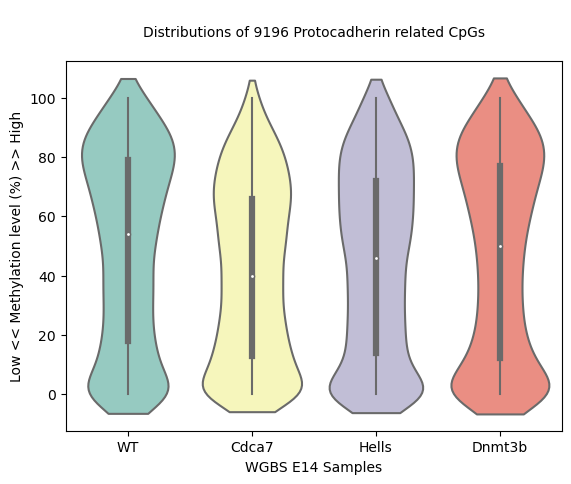

In [6]:
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns


plt.title("\nDistributions of 9196 Protocadherin related CpGs\n", size=10, color='black')
sns.violinplot(data=df_all, palette="Set3", bw=.2, cut=1, linewidth=1.5)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("WGBS E14 Samples", fontsize=10);

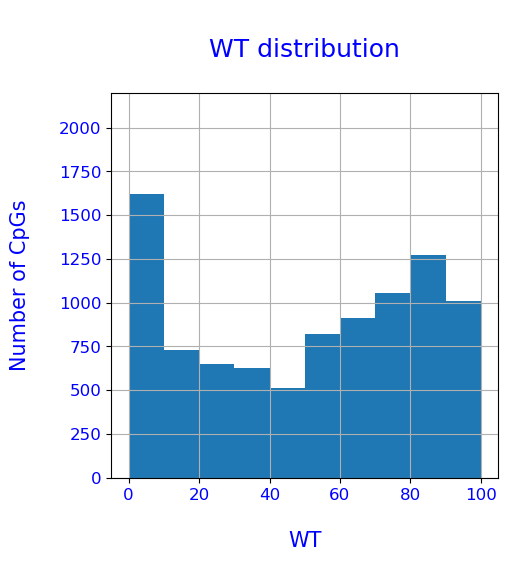

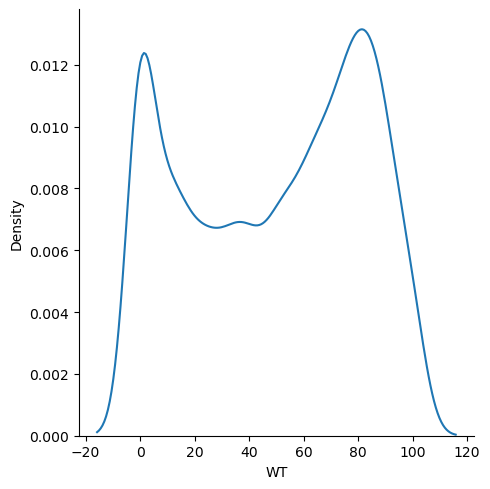

In [7]:
df_all['WT'].hist(bins=10, figsize=(5, 5))
plt.xlabel('\nWT', size=15, color='blue')
plt.ylabel('Number of CpGs\n', size=15, color='blue')
plt.xticks(color='b', size=12)
plt.yticks(color='b', size=12)
plt.title('\nWT distribution\n', size=18, color='blue')
plt.ylim(0, 2200) # set y-axis limits
sns.displot(df_all, x="WT", kind="kde");

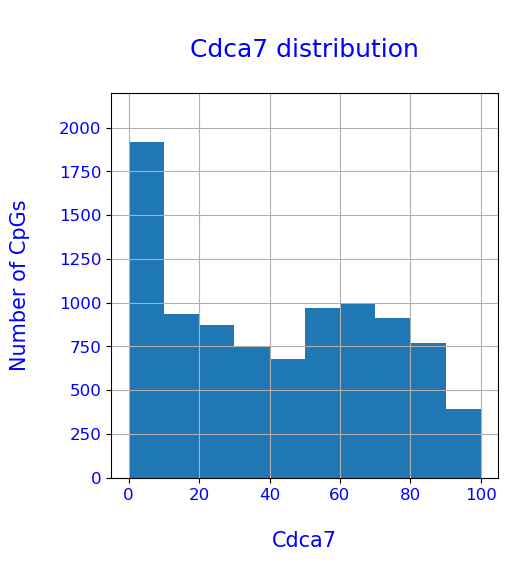

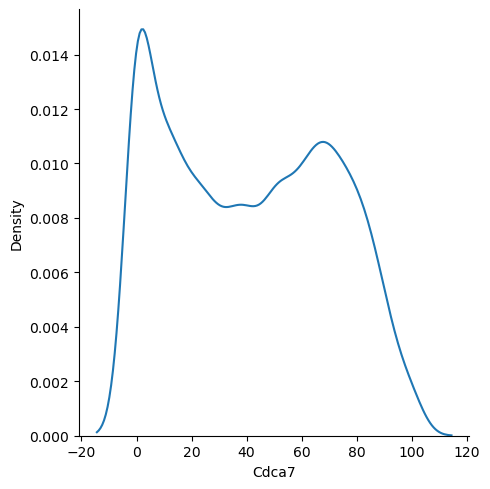

In [8]:
df_all['Cdca7'].hist(bins=10, figsize=(5, 5))
plt.xlabel('\nCdca7', size=15, color='blue')
plt.ylabel('Number of CpGs\n', size=15, color='blue')
plt.xticks(color='b', size=12)
plt.yticks(color='b', size=12)
plt.title('\nCdca7 distribution\n', size=18, color='blue')
plt.ylim(0, 2200) # set y-axis limits
sns.displot(df_all, x="Cdca7", kind="kde");

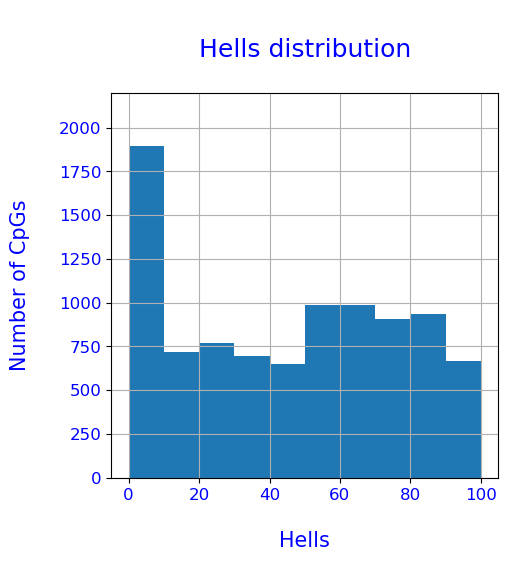

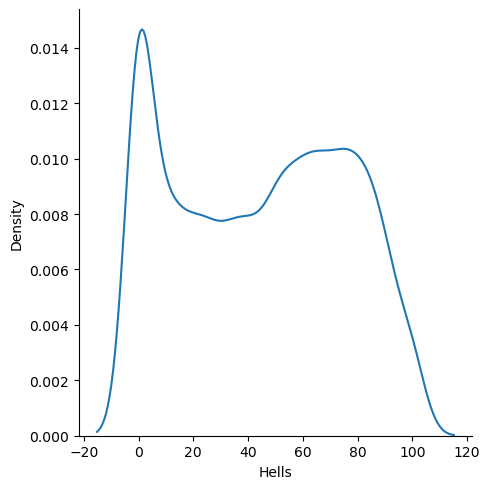

In [9]:
df_all['Hells'].hist(bins=10, figsize=(5, 5))
plt.xlabel('\nHells', size=15, color='blue')
plt.ylabel('Number of CpGs\n', size=15, color='blue')
plt.xticks(color='b', size=12)
plt.yticks(color='b', size=12)
plt.title('\nHells distribution\n', size=18, color='blue')
plt.ylim(0, 2200) # set y-axis limits
sns.displot(df_all, x="Hells", kind="kde");

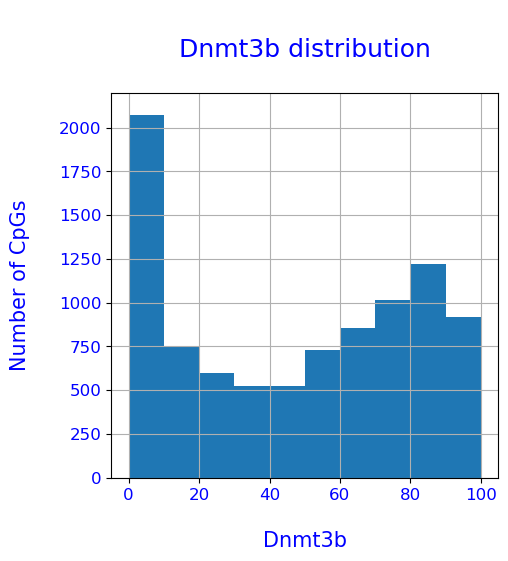

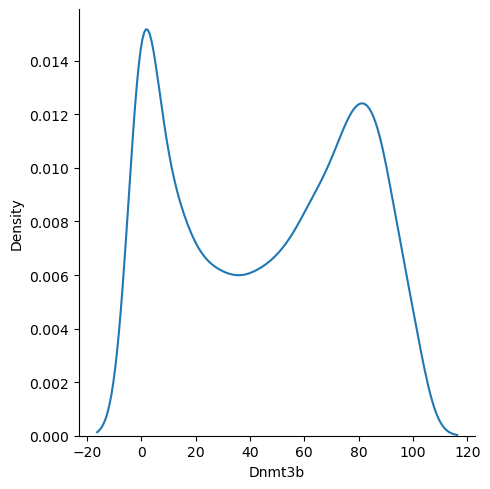

In [10]:
df_all['Dnmt3b'].hist(bins=10, figsize=(5, 5))
plt.xlabel('\nDnmt3b', size=15, color='blue')
plt.ylabel('Number of CpGs\n', size=15, color='blue')
plt.xticks(color='b', size=12)
plt.yticks(color='b', size=12)
plt.title('\nDnmt3b distribution\n', size=18, color='blue')
plt.ylim(0, 2200) # set y-axis limits
sns.displot(df_all, x="Dnmt3b", kind="kde");

In [11]:
# Just for CpGs located in Promoters

mask2 = df_main['annotation'].str.contains('Promoter', case=False, na=False)
mask2
df_promoters = df_main[mask2]
df_promoters

,chr,start,end,width,strand,CpG,WT,Cdca7,Hells,Dnmt3b,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,SYMBOL
8368444,chr18,36928021,36928021,1,*,8368443,30,41,40,14,Promoter (2-3kb),18,36930184,37187661,257478,1,116731,ENSMUST00000193839.5,-2163.0,Pcdha1
8368445,chr18,36928304,36928304,1,*,8368444,45,50,29,57,Promoter (1-2kb),18,36930184,37187661,257478,1,116731,ENSMUST00000193839.5,-1880.0,Pcdha1
8368446,chr18,36928641,36928641,1,*,8368445,83,47,60,60,Promoter (1-2kb),18,36930184,37187661,257478,1,116731,ENSMUST00000193839.5,-1543.0,Pcdha1
8368447,chr18,36928807,36928807,1,*,8368446,86,42,60,81,Promoter (1-2kb),18,36930184,37187661,257478,1,116731,ENSMUST00000193839.5,-1377.0,Pcdha1
8368448,chr18,36928823,36928823,1,*,8368447,78,58,58,88,Promoter (1-2kb),18,36930184,37187661,257478,1,116731,ENSMUST00000193839.5,-1361.0,Pcdha1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378392,chr18,37826651,37826651,1,*,8378391,16,0,0,0,Promoter (1-2kb),18,37824737,37840380,15644,1,93705,ENSMUST00000194980.1,1914.0,Pcdhgb8
8378393,chr18,37826689,37826689,1,*,8378392,54,18,14,14,Promoter (1-2kb),18,37824737,37840380,15644,1,93705,ENSMUST00000194980.1,1952.0,Pcdhgb8
8378394,chr18,37826962,37826962,1,*,8378393,66,27,42,27,Promoter (2-3kb),18,37824737,37840380,15644,1,93705,ENSMUST00000194980.1,2225.0,Pcdhgb8
8378395,chr18,37827069,37827069,1,*,8378394,86,64,65,72,Promoter (2-3kb),18,37824737,37840380,15644,1,93705,ENSMUST00000194980.1,2332.0,Pcdhgb8


In [12]:
df_pro = df_promoters[['WT', 'Cdca7', 'Hells', 'Dnmt3b']]
df_pro

,WT,Cdca7,Hells,Dnmt3b
8368444,30,41,40,14
8368445,45,50,29,57
8368446,83,47,60,60
8368447,86,42,60,81
8368448,78,58,58,88
...,...,...,...,...
8378392,16,0,0,0
8378393,54,18,14,14
8378394,66,27,42,27
8378395,86,64,65,72


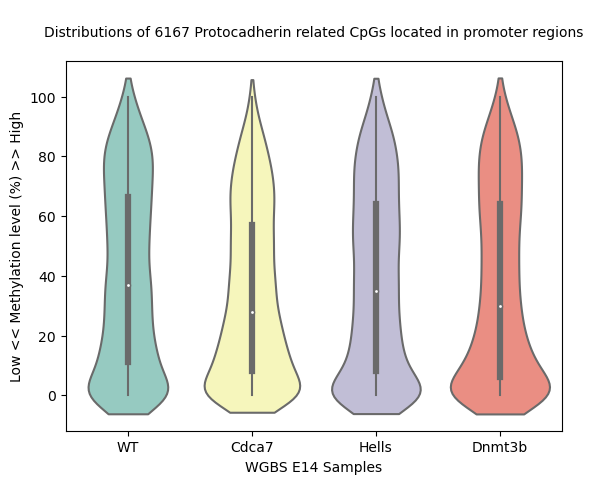

In [13]:
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns


plt.title("\nDistributions of 6167 Protocadherin related CpGs located in promoter regions\n", size=10, color='black')
sns.violinplot(data=df_pro, palette="Set3", bw=.2, cut=1, linewidth=1.5)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("WGBS E14 Samples", fontsize=10);

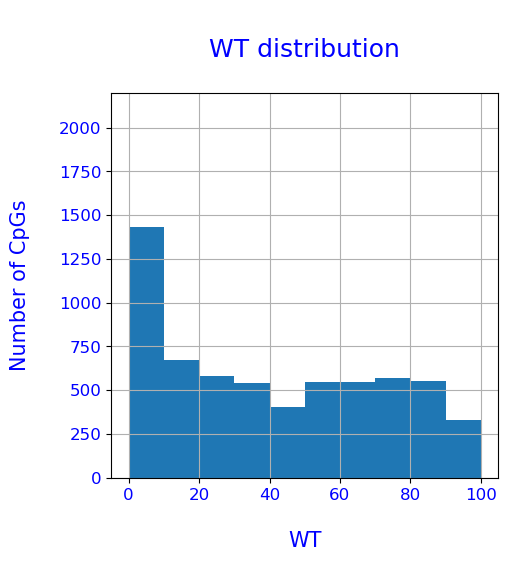

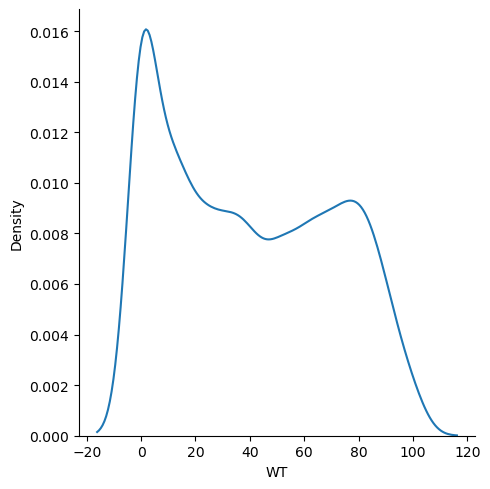

In [14]:
df_pro['WT'].hist(bins=10, figsize=(5, 5))
plt.xlabel('\nWT', size=15, color='blue')
plt.ylabel('Number of CpGs\n', size=15, color='blue')
plt.xticks(color='b', size=12)
plt.yticks(color='b', size=12)
plt.title('\nWT distribution\n', size=18, color='blue')
plt.ylim(0, 2200) # set y-axis limits
sns.displot(df_pro, x="WT", kind="kde");

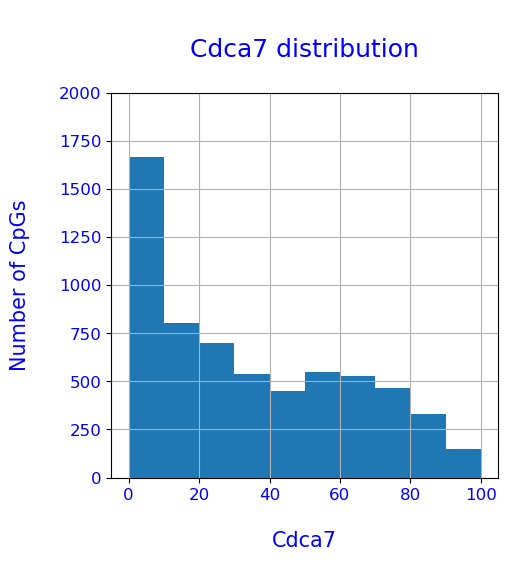

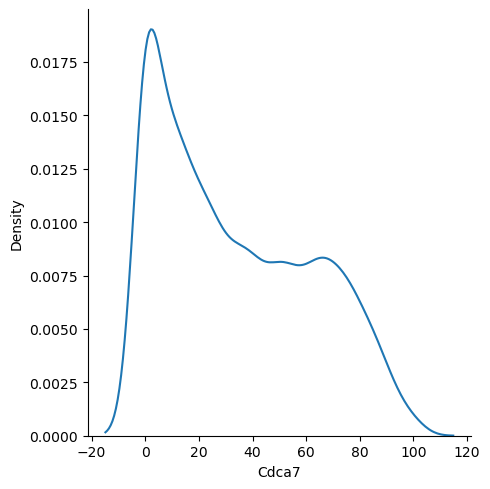

In [15]:
df_pro['Cdca7'].hist(bins=10, figsize=(5, 5))
plt.xlabel('\nCdca7', size=15, color='blue')
plt.ylabel('Number of CpGs\n', size=15, color='blue')
plt.xticks(color='b', size=12)
plt.yticks(color='b', size=12)
plt.title('\nCdca7 distribution\n', size=18, color='blue')
plt.ylim(0, 2000) # set y-axis limits
sns.displot(df_pro, x="Cdca7", kind="kde");

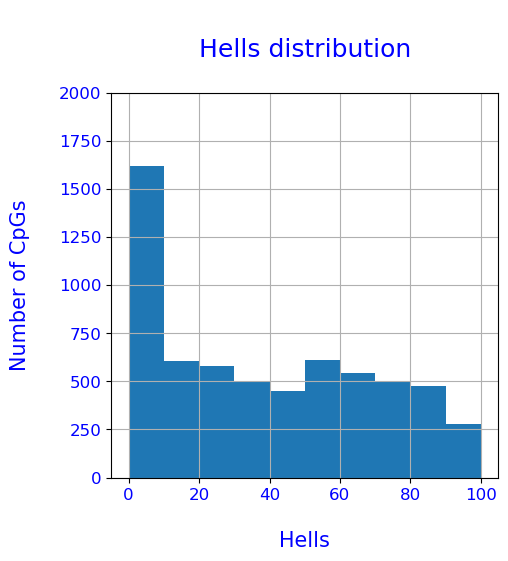

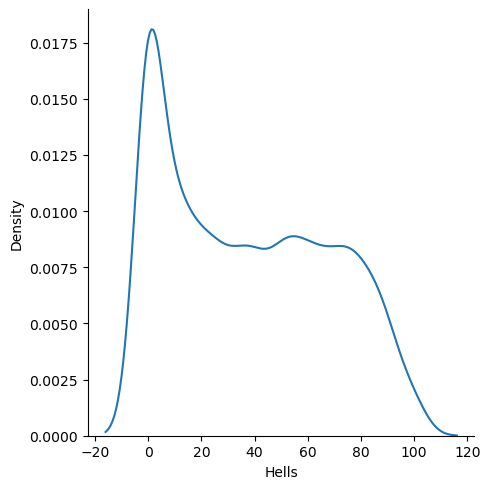

In [16]:
df_pro['Hells'].hist(bins=10, figsize=(5, 5))
plt.xlabel('\nHells', size=15, color='blue')
plt.ylabel('Number of CpGs\n', size=15, color='blue')
plt.xticks(color='b', size=12)
plt.yticks(color='b', size=12)
plt.title('\nHells distribution\n', size=18, color='blue')
plt.ylim(0, 2000) # set y-axis limits
sns.displot(df_pro, x="Hells", kind="kde");

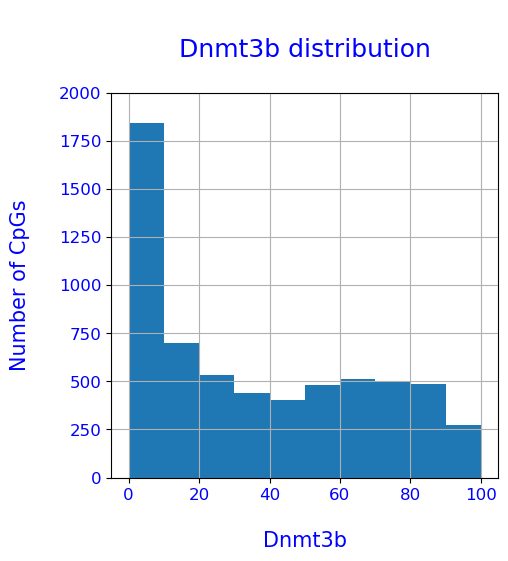

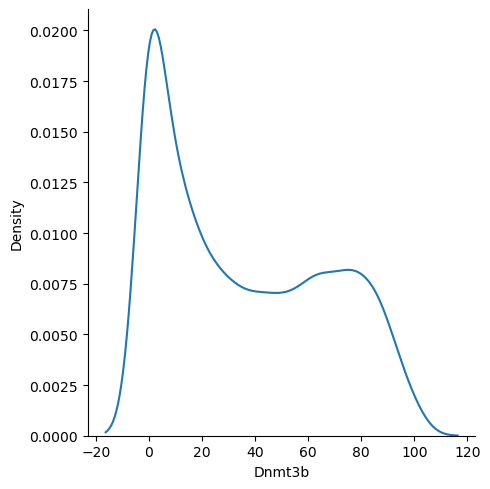

In [17]:
df_pro['Dnmt3b'].hist(bins=10, figsize=(5, 5))
plt.xlabel('\nDnmt3b', size=15, color='blue')
plt.ylabel('Number of CpGs\n', size=15, color='blue')
plt.xticks(color='b', size=12)
plt.yticks(color='b', size=12)
plt.title('\nDnmt3b distribution\n', size=18, color='blue')
plt.ylim(0, 2000) # set y-axis limits
sns.displot(df_pro, x="Dnmt3b", kind="kde");